C:\Users\arsma\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\arsma\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
C:\Users\arsma\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


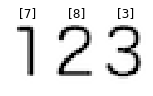

In [10]:
#from detect_zip import *
import cv2
import matplotlib.pyplot as plt

from sklearn.externals import joblib

#はがき画像から郵便番号領域を抽出する関数
def detect_zipno(fname):
    #画像を読み込む
    img = cv2.imread(fname)
    #画像のサイズを求める
    h,w = img.shape[:2]
    #はがき画像の右上のみ抽出する
    img = img[0:h//2, w//3:]
    
    #画像を二値化
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3,3),0)
    im2 = cv2.threshold(gray,140,255,cv2.THRESH_BINARY_INV)[1]
    
    #輪郭を抽出
    cnts = cv2.findContours(im2,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0]
    
    #抽出した輪郭を単純なリストに変換
    result = []
    for pt in cnts:
        x,y,w,h = cv2.boundingRect(pt)
        #大きすぎる小さすぎる領域を除去
        if not(30<w<40):continue
        result.append([x,y,w,h])
    
    #抽出した輪郭が左側から並ぶようソート
    result = sorted(result, key=lambda x: x[0])
    
    #抽出した輪郭が近すぎるものを除去
    result2 = []
    lastx = -100
    for x,y,w,h in result:
        if(x-lastx) < 10 : continue
        result2.append([x,y,w,h])
        lastx =x
        
    #緑色の枠を描画
    for x,y,w,h in result2:
        cv2.rectangle(img,(x,y),(x+w,y+h), (0,255,0),3)
    return result2, img


#学習済み手書きデータを読み込む
clf = joblib.load("3_3_2_digits.pkl")

#画像から領域を読み込む
cnts, img = detect_zipno("3_4_2_test2.png")

#読み込んだデータをプロット
for i, pt in enumerate(cnts):
    x,y,w,h=pt
    #枠線の輪郭分だけ小さくする
    x += 8
    y += 8
    w -= 16
    h -= 16
    #画像データを取り出す
    im2 = img[y:y+h,x:x+w]
    #データを学習済みデータに合わせる
    im2gray=cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)#グレイスケールに
    im2gray=cv2.resize(im2gray,(8,8))#リサイズ
    im2gray=15-im2gray//16
    im2gray=im2gray.reshape((-1,64))#一次元に変換
    
    #データ予測する
    res=clf.predict(im2gray)
    #画面に出力
    plt.subplot(1,7,i+1)
    plt.imshow(im2)
    plt.axis("off")
    plt.title(res)

plt.show()